# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1694]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

from numpy import sqrt
from numpy import argmax

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


import time

from uszipcode import SearchEngine

## Loading the dataset

In [1695]:
Loan_Data = pd.read_csv("Loan_Modelling.csv") 

## Data Overview

* Observations
* Sanity checks

In [1696]:
# Review columns and data types
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [1697]:
# Generate descriptive stats on the data set
Loan_Data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Observations
- I see some negative values inthe experience column, probably will need to set these to 0

In [1698]:
# Provide a view of the count of rowns and columns in the dat set.
print("The data set has " + str(Loan_Data.shape[0]) + " columns and " + str(Loan_Data.shape[1]) + " rows.")

The data set has 5000 columns and 14 rows.


In [1699]:
# Get top 5 rows
Loan_Data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Observations 
- We can see that we will need to remove the ID column as it is not useful in our analysis.

In [1700]:
# Identify if we have any missing data
Loan_Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations 
- We can see there is not any missing data.

## Data Preprocessing 1st iteration
- Already checked for missing data
- We will manage zipcode categorizing and also create county, city and state


In [1701]:
# Drop the ID column before we start the next analysis
Loan_Data.drop(columns=['ID'], inplace=True)


In [1702]:
#create the search engine
search = SearchEngine()

cityArray = []
stateArray = []
countyArray = []
def getCity(z):
    return search.by_zipcode(zip).city
def getCounty(z):
    return search.by_zipcode(zip).county
def getState(z):
    return search.by_zipcode(zip).state

#Loop through zipcodes and set state
for i in range(len(Loan_Data)):
    zip = Loan_Data["ZIPCode"].iloc[i]
    try:
        cityArray.append(getCity(zip))
    except Exception as e: 
        cityArray.append(np.nan)
    try:
        countyArray.append(getCounty(zip))
    except Exception as e: 
        countyArray.append(np.nan)
    try:
        stateArray.append(getState(zip))
    except Exception as e: 
        stateArray.append(np.nan)
    continue

Loan_Data['City'] = cityArray
Loan_Data['County'] = countyArray
Loan_Data['State'] = stateArray
Loan_Data.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County,State
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County,CA
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County,CA
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County,CA
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County,CA
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County,CA
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego,San Diego County,CA
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,Claremont,Los Angeles County,CA
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey,Monterey County,CA
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles,Los Angeles County,CA
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Ojai,Ventura County,CA


In [1703]:
Loan_Data['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

#### Observtions
- All of the data is coming form a single state. In this case California.

In [1704]:
Loan_Data['City'].unique()

array(['Pasadena', 'Los Angeles', 'Berkeley', 'San Francisco',
       'Northridge', 'San Diego', 'Claremont', 'Monterey', 'Ojai',
       'Redondo Beach', 'Santa Barbara', 'Belvedere Tiburon', 'Glendora',
       'Santa Clara', 'Capitola', 'Stanford', 'Studio City', 'Daly City',
       'Newbury Park', 'Arcata', 'Santa Cruz', 'Fremont', 'Richmond',
       'Mountain View', 'Huntington Beach', 'Sacramento', 'San Clemente',
       'Davis', 'Redwood City', 'Cupertino', 'Santa Clarita', 'Roseville',
       'Redlands', 'La Jolla', 'Brisbane', 'El Segundo', 'Los Altos',
       'Santa Monica', 'San Luis Obispo', 'Pleasant Hill',
       'Thousand Oaks', 'Rancho Cordova', 'San Jose', 'Reseda', 'Salinas',
       'Cardiff By The Sea', 'Oakland', 'San Rafael', 'Banning',
       'Bakersfield', 'Riverside', 'Rancho Cucamonga', 'Alameda',
       'Palo Alto', 'Livermore', 'Irvine', 'South San Francisco',
       'Emeryville', 'Ridgecrest', nan, 'Hayward', 'San Gabriel',
       'Santa Ana', 'Loma Linda', 'E

In [1705]:
Loan_Data['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County', nan,
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

In [1706]:
Loan_Data.isna().sum()

Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
City                  34
County                34
State                 34
dtype: int64

In [1707]:
# Identify the missing zip codes 
missingZips = Loan_Data[Loan_Data['State'].isnull()]

In [1708]:
#look a the counts in each zip
missingZips['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

### missing zips
- 3 of the missing zips are from california by simply googling
- 1 is from washington dc
- We will manually code these in the data



In [1709]:
# Make updates to eahc state, city and county manually for the zipcodes that did not match
for i in range(len(Loan_Data)):
    zip = Loan_Data["ZIPCode"].iloc[i]
    if zip == 92717:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"
    if zip == 96651:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"
    if zip == 92634:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "Los Angeles"
        Loan_Data["County"].iloc[i] = "Los Angeles County"
    if zip == 93077:
        Loan_Data["State"].iloc[i] = "CA"
        Loan_Data["City"].iloc[i] = "San Francisco"
        Loan_Data["County"].iloc[i] = "San Francisco County"

In [1710]:
#check missing vvalues for state one more time
Loan_Data.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
County                0
State                 0
dtype: int64

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [1711]:
# Setup reusable plot functions


# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature,yLabel, xLabel, title, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    bp = sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    hp = sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", 
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    bp.set(title=title)
    hp.set(ylabel=yLabel,
        xlabel=xLabel)

# function to create labeled barplots


def labeled_barplot(data, feature,yLabel, xLabel, title, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    ax.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

def hist_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn box plot
    hp = sns.histplot(data=Loan_Data, x=x)

    #specify axis labels
    hp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()


def count_plot(x,yLabel, xLabel, title):
    
    plt.figure(figsize=(15, 7))
    # Create seaborn countplot
    cp = sns.countplot(data=Loan_Data, x=x)
    #specify axis labels
    cp.set(ylabel=yLabel,
        xlabel=xLabel,
        title=title)
    plt.show()

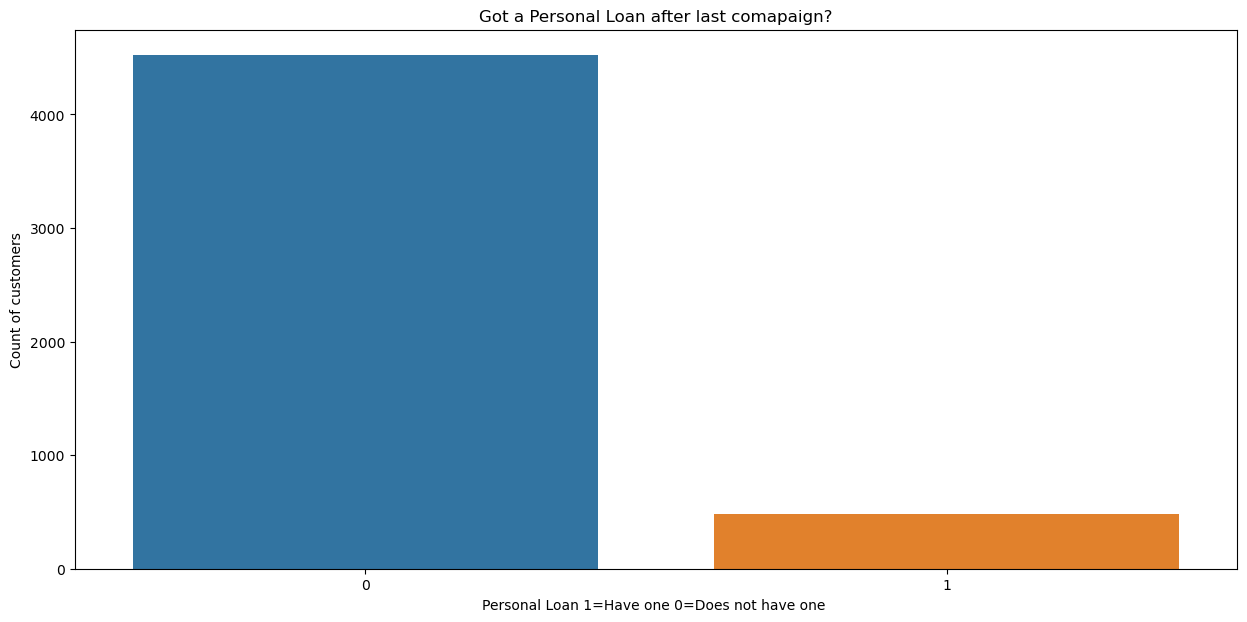

In [1712]:
count_plot(Loan_Data['Personal_Loan'],'Count of customers', 'Personal Loan 1=Have one 0=Does not have one ','Got a Personal Loan after last comapaign?')

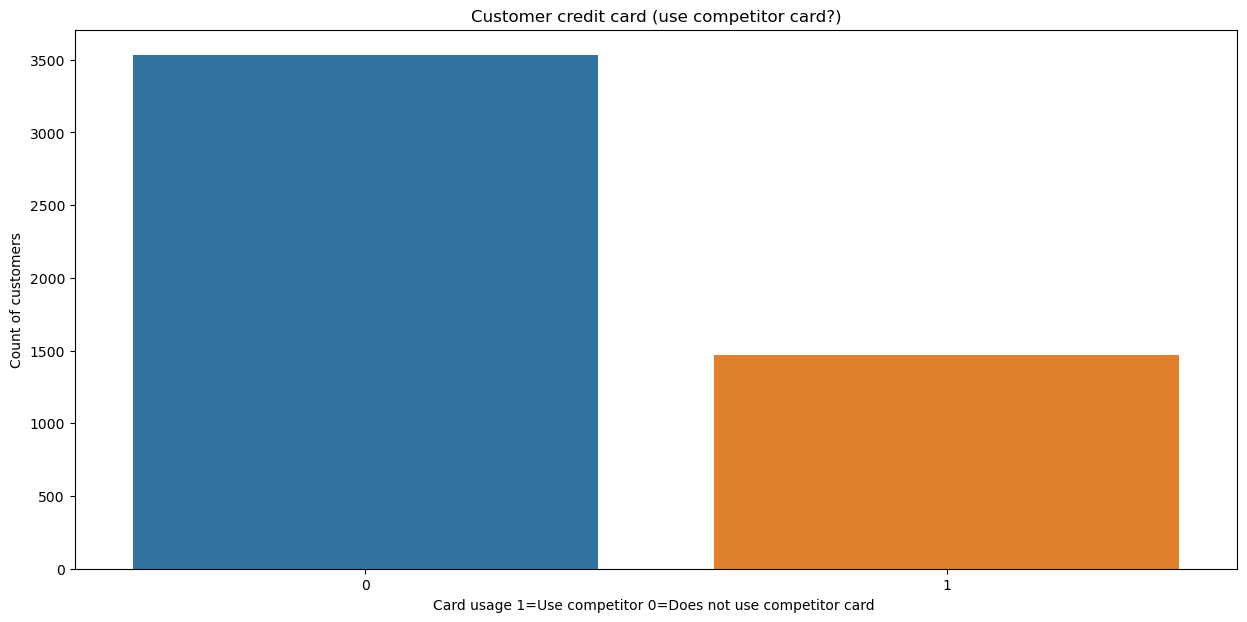

In [1713]:
count_plot(Loan_Data['CreditCard'],'Count of customers', 'Card usage 1=Use competitor 0=Does not use competitor card ','Customer credit card (use competitor card?)')

### Observations
- Can see that we have 3500 customers that use another banks credit card and 1500 that do not.

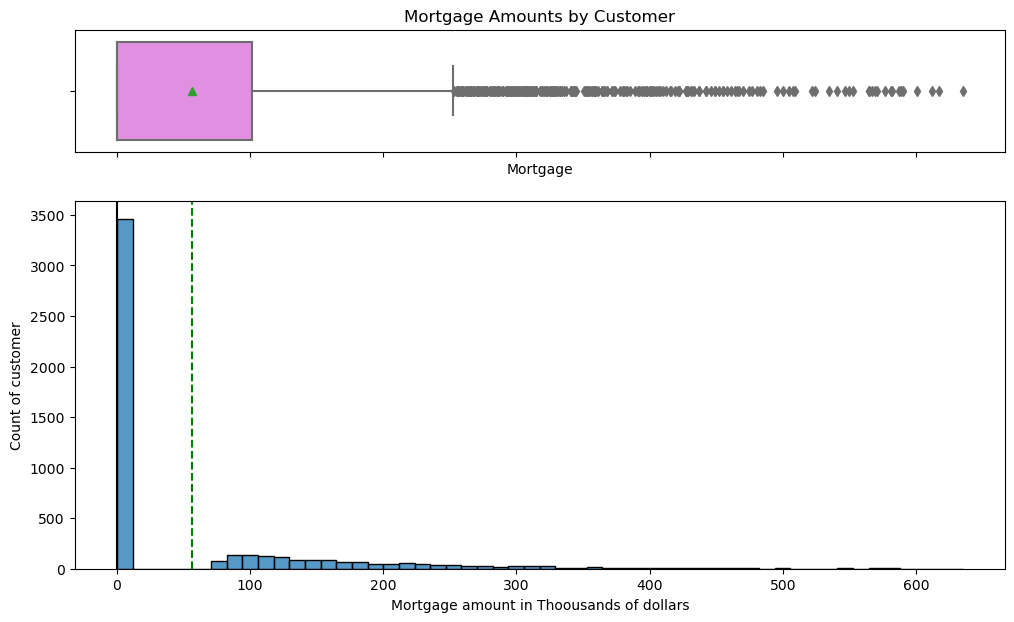

In [1714]:
# Mortgage plots
histogram_boxplot(Loan_Data, 'Mortgage','Count of customer','Mortgage amount in Thoousands of dollars','Mortgage Amounts by Customer')

### Observations
- There are a lot customers that do not have a mortgage in the dataset, I am assuming 0 in the data means they do not have a mortgage. About 3500.
- The data is heavily right skewed
- There are many outliers in the data set as shown in the box plot

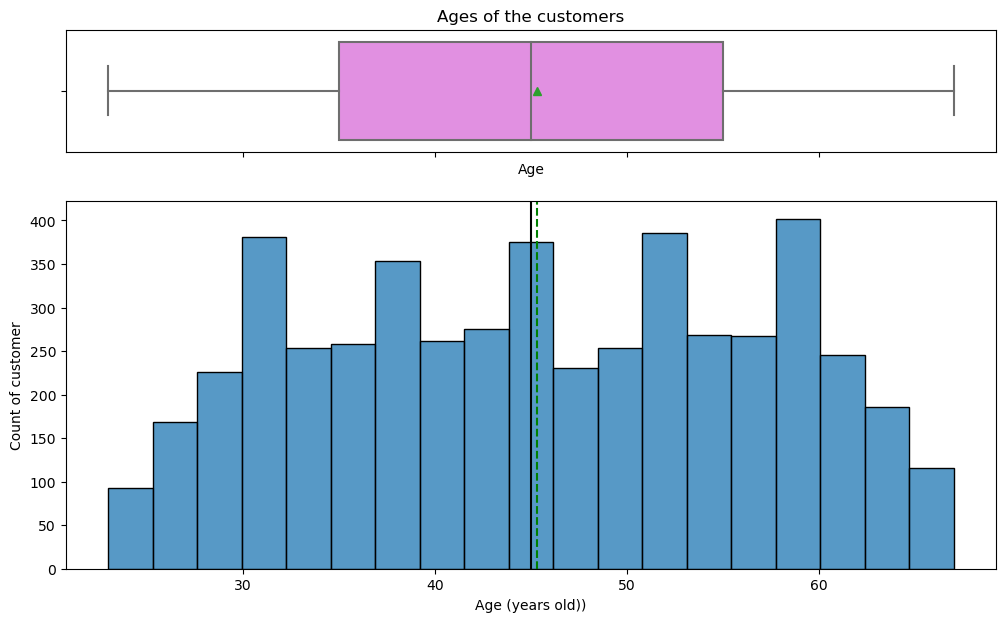

In [1715]:
# Age plots
histogram_boxplot(Loan_Data, 'Age','Count of customer','Age (years old))','Ages of the customers')

### Observations
- Average age of the customers is about 45 years old
- Age is pretty evently distributed with some spikes in certain age categories above and below 45 in the data.
- There are no outliers in the data set as shown in the box plot

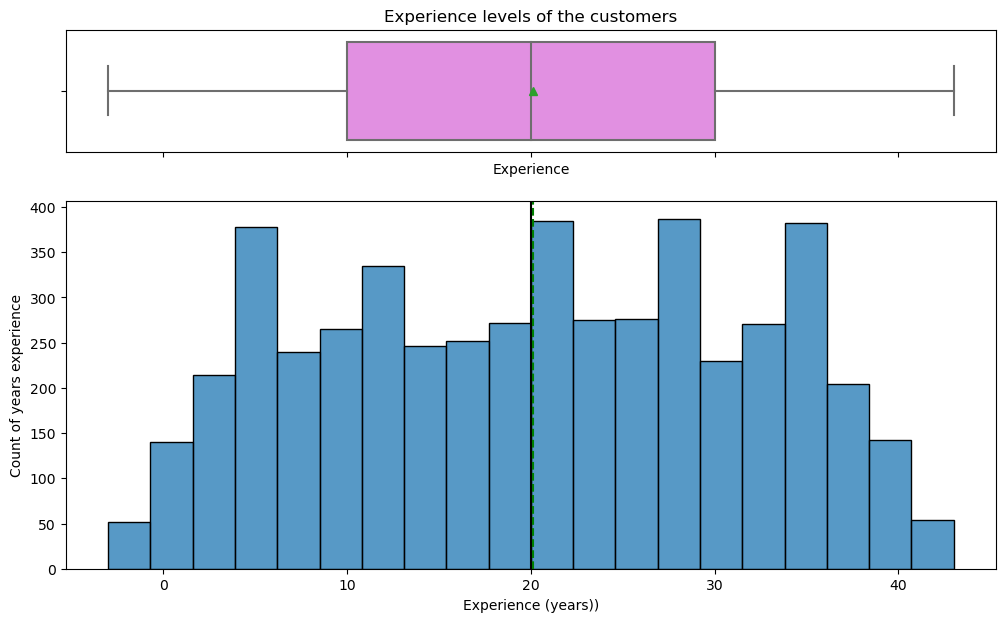

In [1716]:
# Age plots
histogram_boxplot(Loan_Data, 'Experience','Count of years experience','Experience (years))','Experience levels of the customers')

### Observations
- Average professional experience level is 20 years.
- Experience is pretty evently distributed with some spikes in certain experience levels above and below 20 in the data.
- There are no outliers in the data set as shown in the box plot

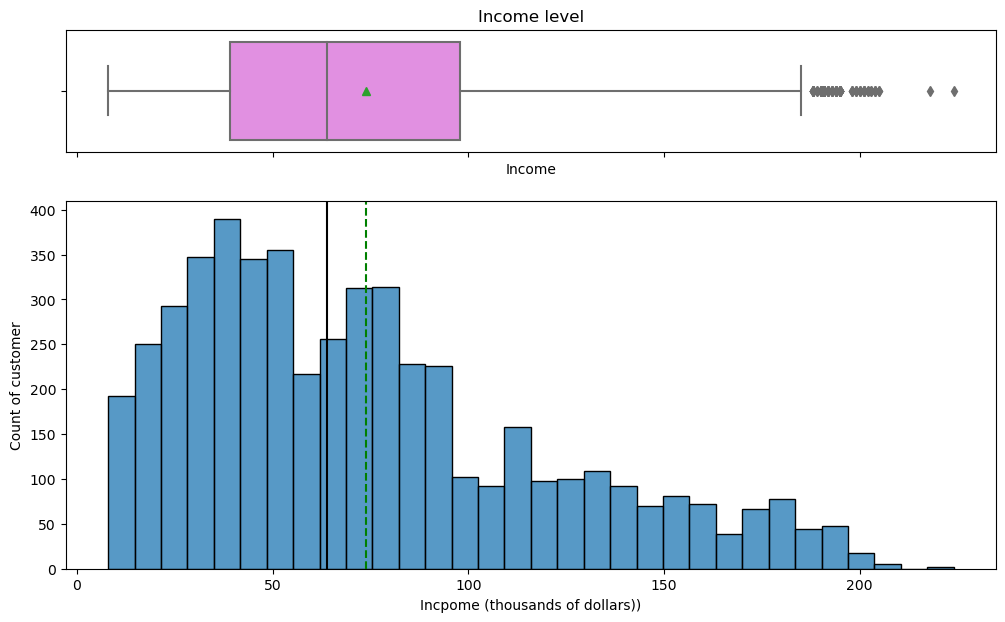

In [1717]:
# Age plots
histogram_boxplot(Loan_Data, 'Income','Count of customer','Incpome (thousands of dollars))','Income level')

### Observations
- Average income level is around 70k
- Income is right skewed with many outliers in the higher income levels


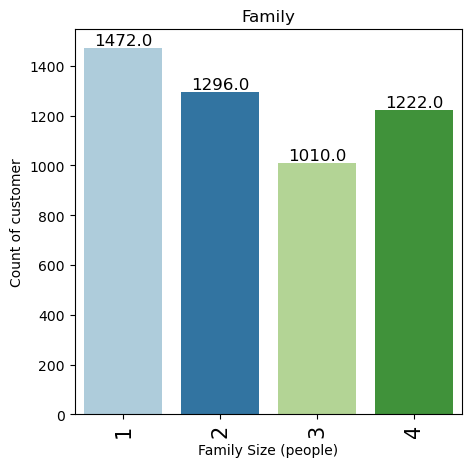

In [1718]:
# Family plots
labeled_barplot(Loan_Data, 'Family','Count of customer','Family Size (people)','Family')

### Observations
- Average family size is about 2.4 people.
- Family size ranges from 1 person to 4.


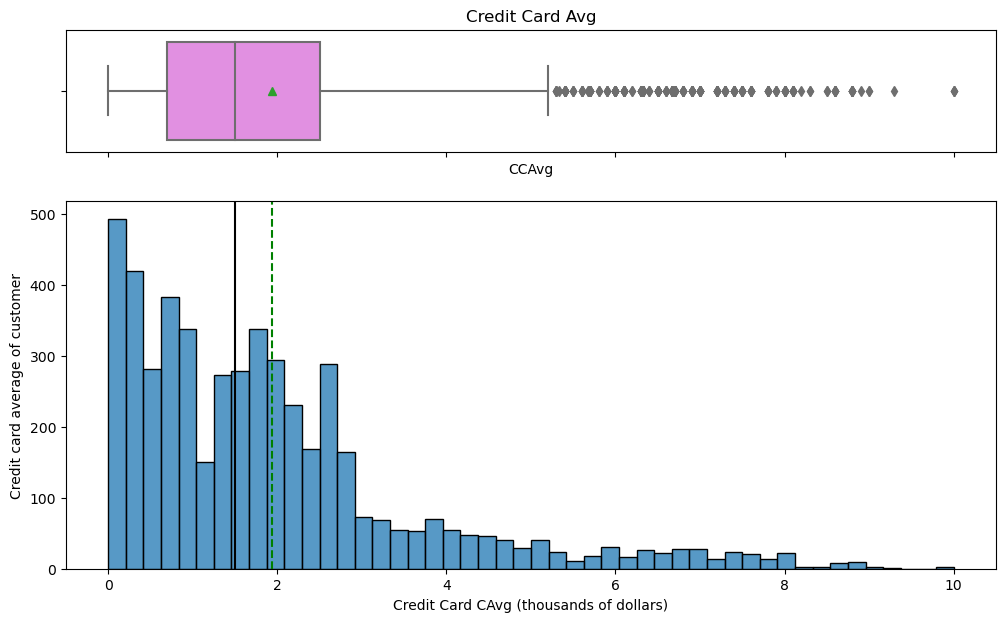

In [1719]:
# CCavg plots
histogram_boxplot(Loan_Data, 'CCAvg','Credit card average of customer','Credit Card CAvg (thousands of dollars)','Credit Card Avg')

### Observations
- Average credit card spending is around 2k
- Average spending is right skewed with many outliers up to 10k

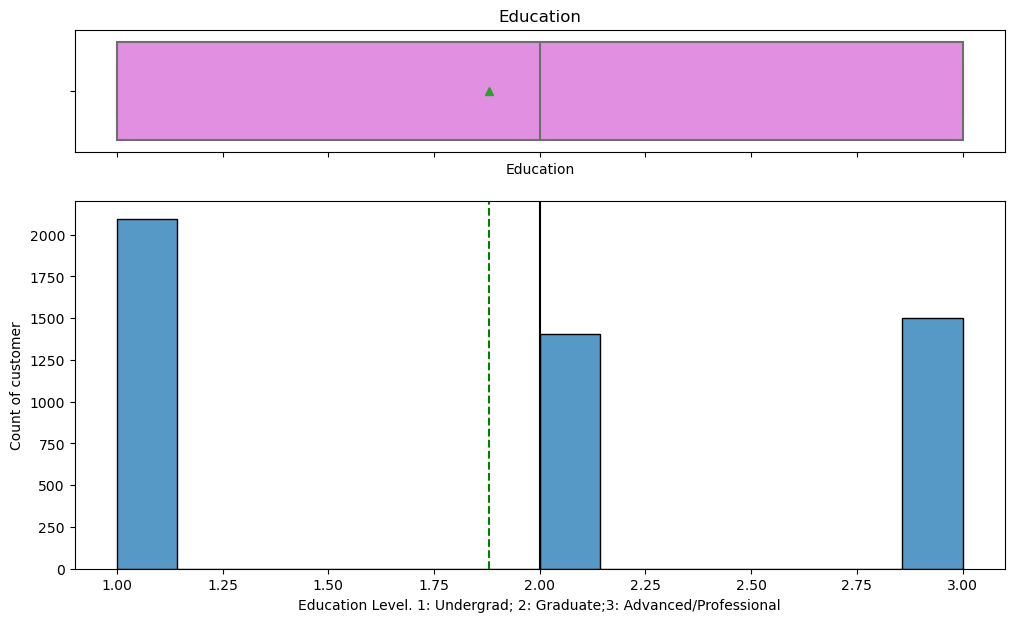

In [1720]:
# Education plots
histogram_boxplot(Loan_Data, 'Education','Count of customer','Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional','Education')

### Observations
- Normal distribution of education levels. A slight amount more of undergrads than other 2 categories.


#### Family size vs Average card spend

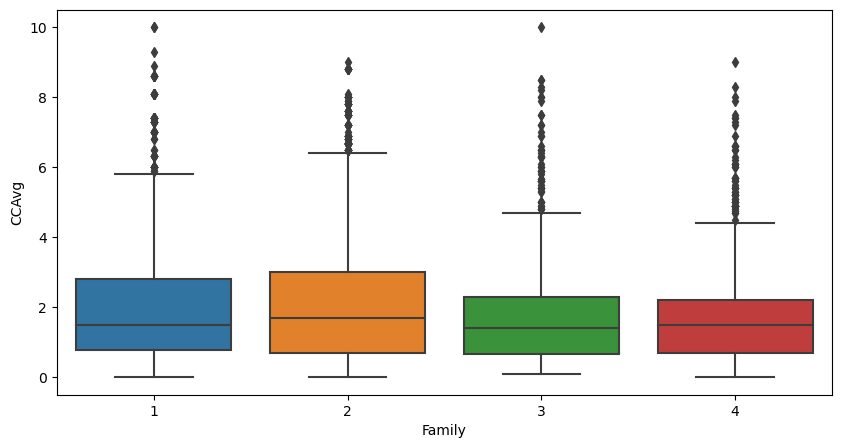

In [1721]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Family", y="CCAvg", data=Loan_Data)
plt.show()

#### Education vs Average card spend

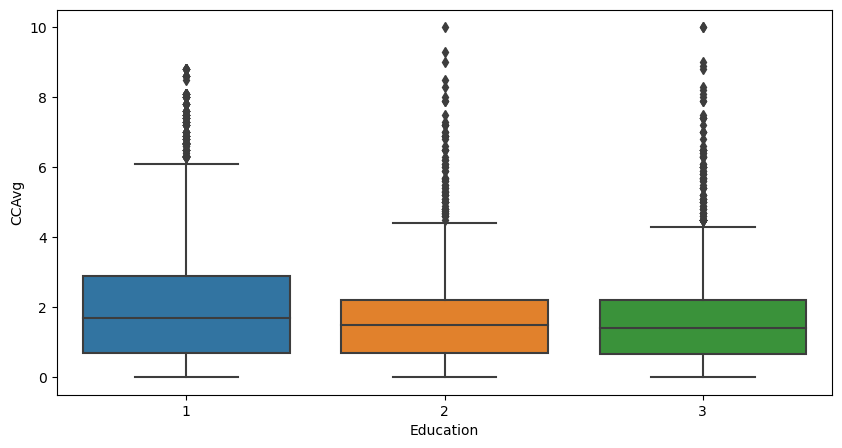

In [1722]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="CCAvg", data=Loan_Data)
plt.show()

#### Income vs Credit card monthly spend

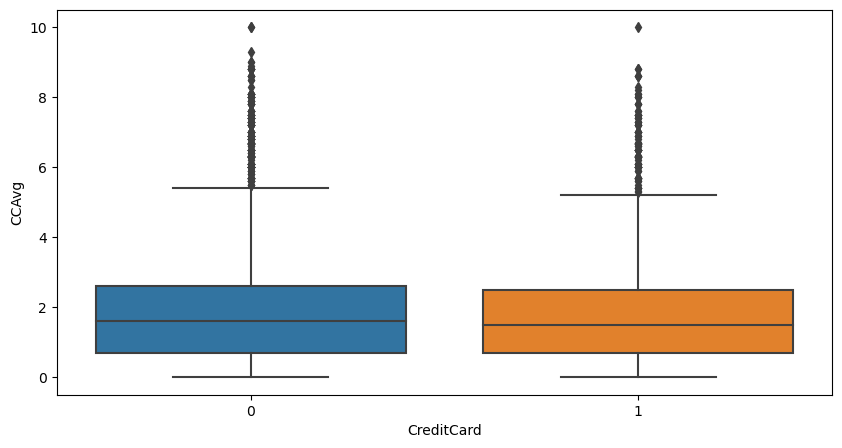

In [1723]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="CreditCard", y="CCAvg", data=Loan_Data)
plt.show()

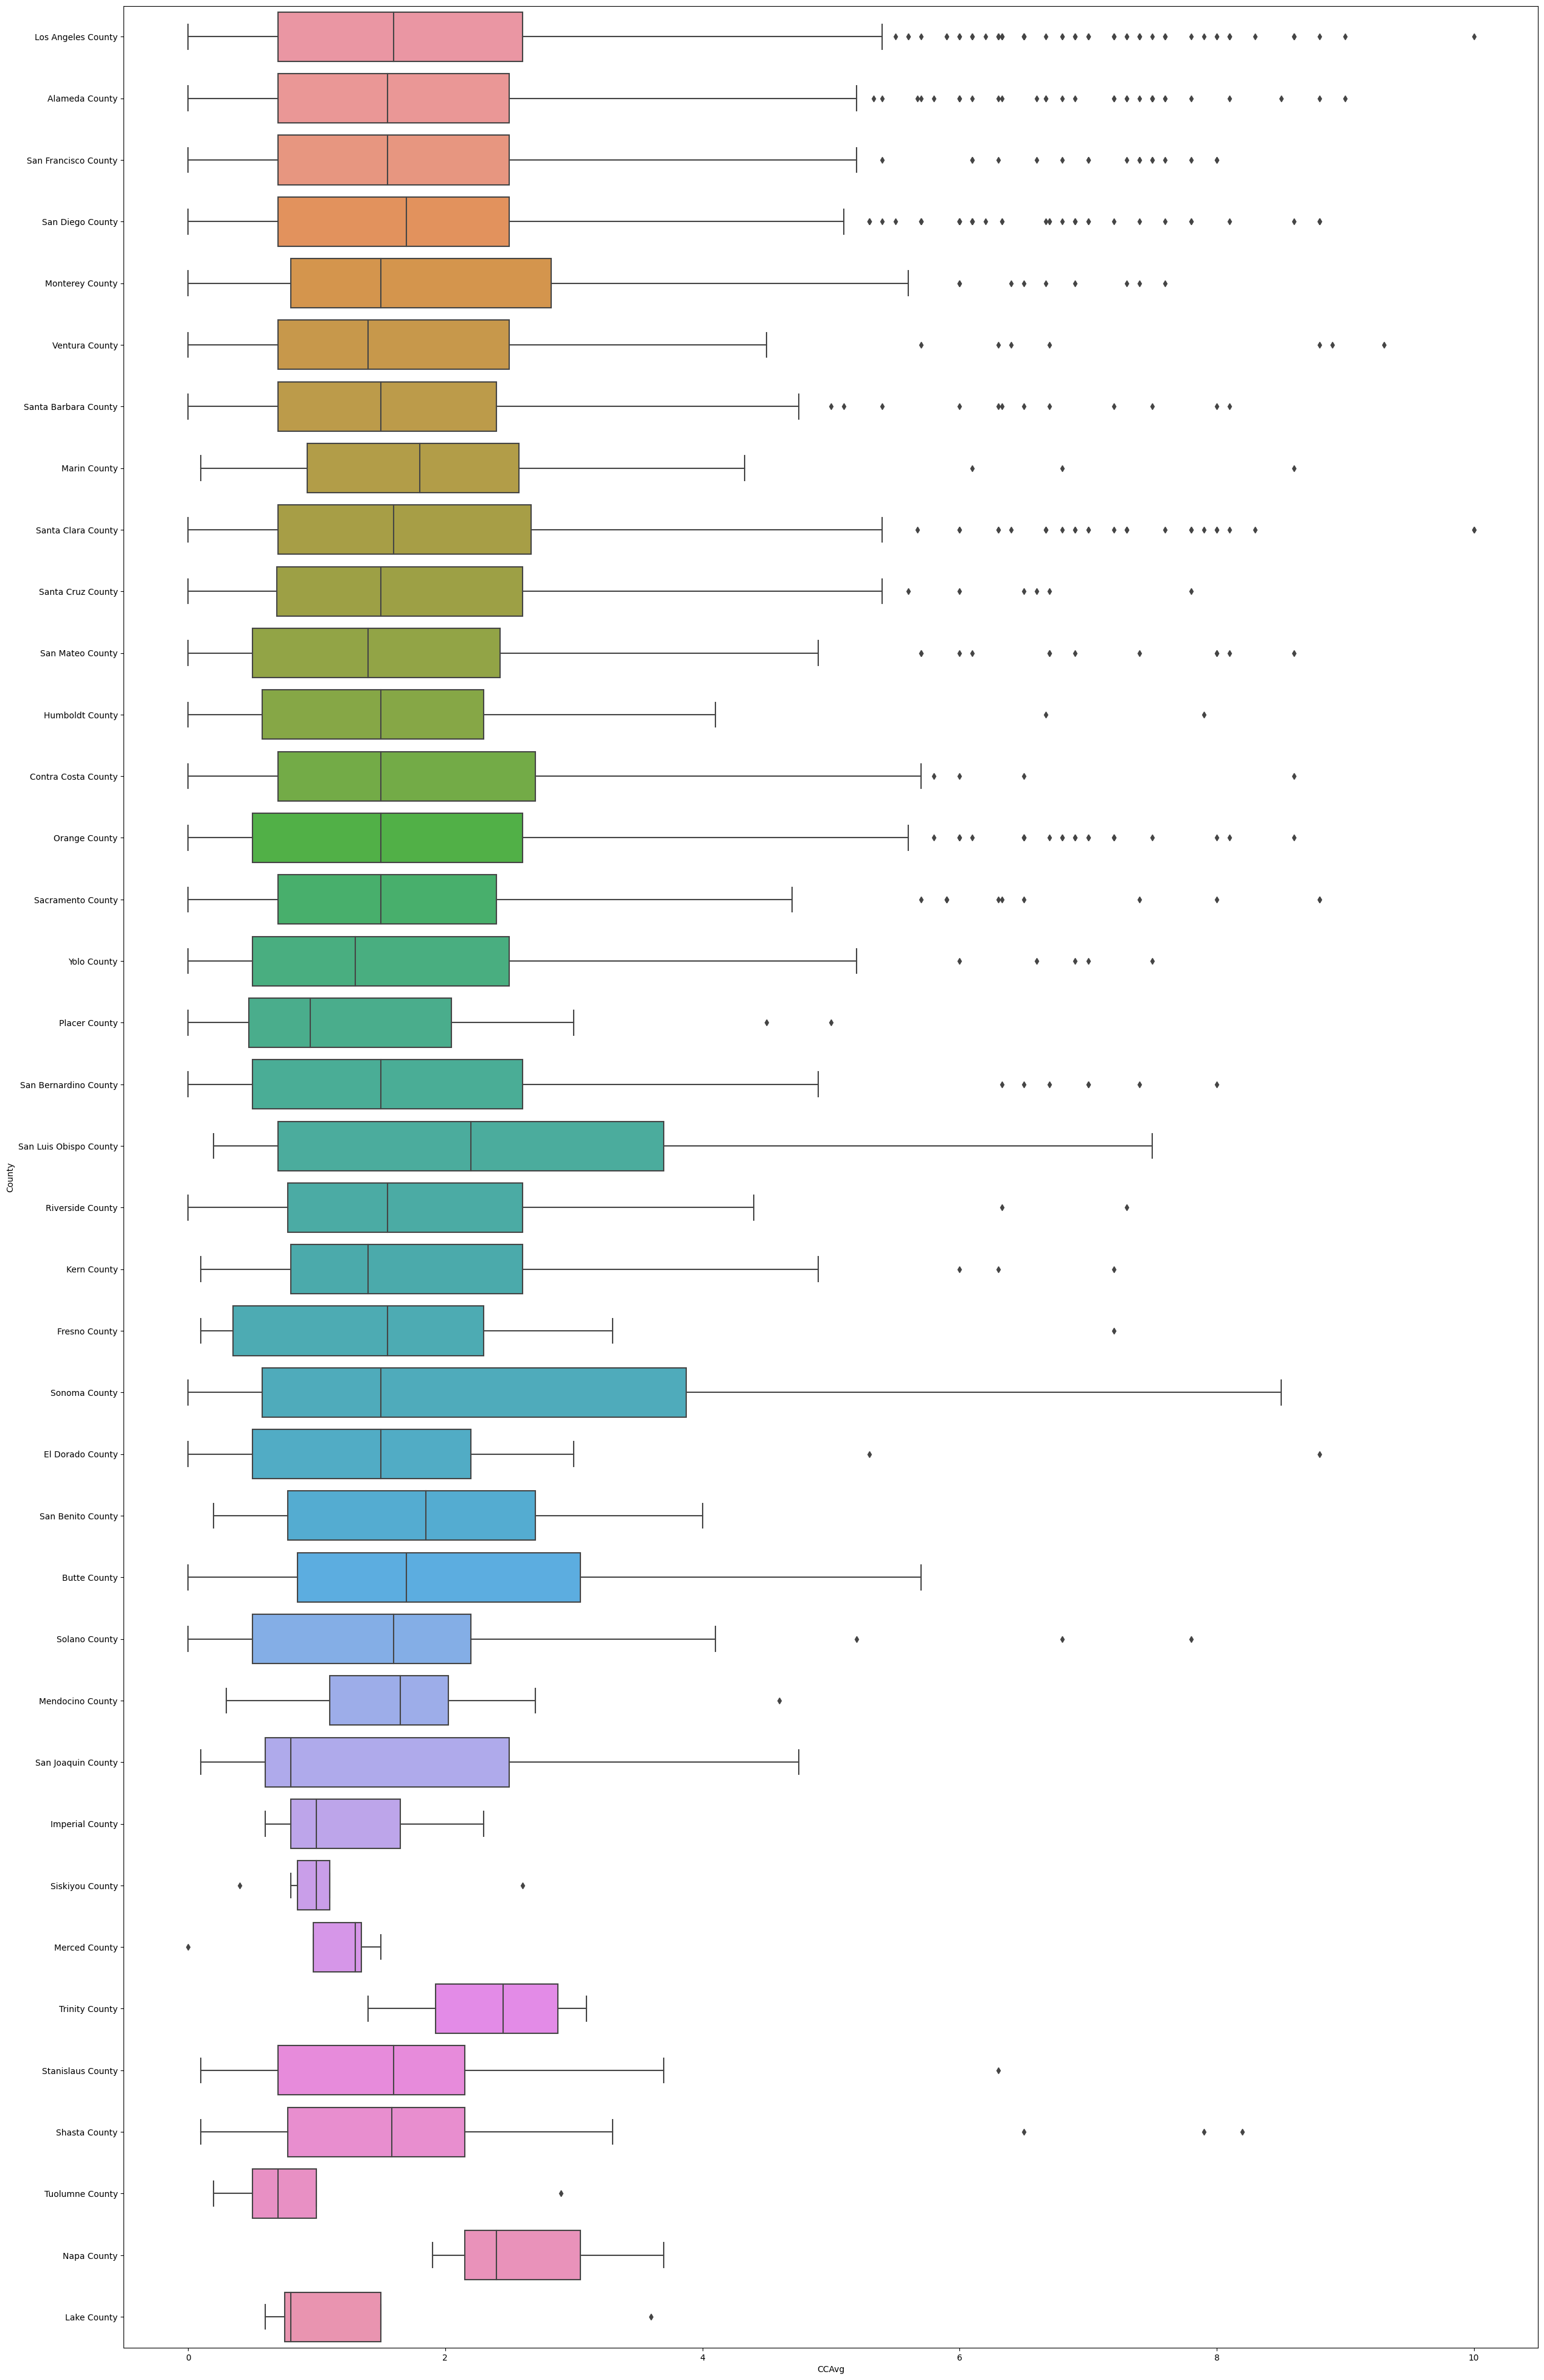

In [1724]:
###
plt.figure(figsize=(30,50))
sns.boxplot(x="CCAvg", y="County", data=Loan_Data)
plt.show()

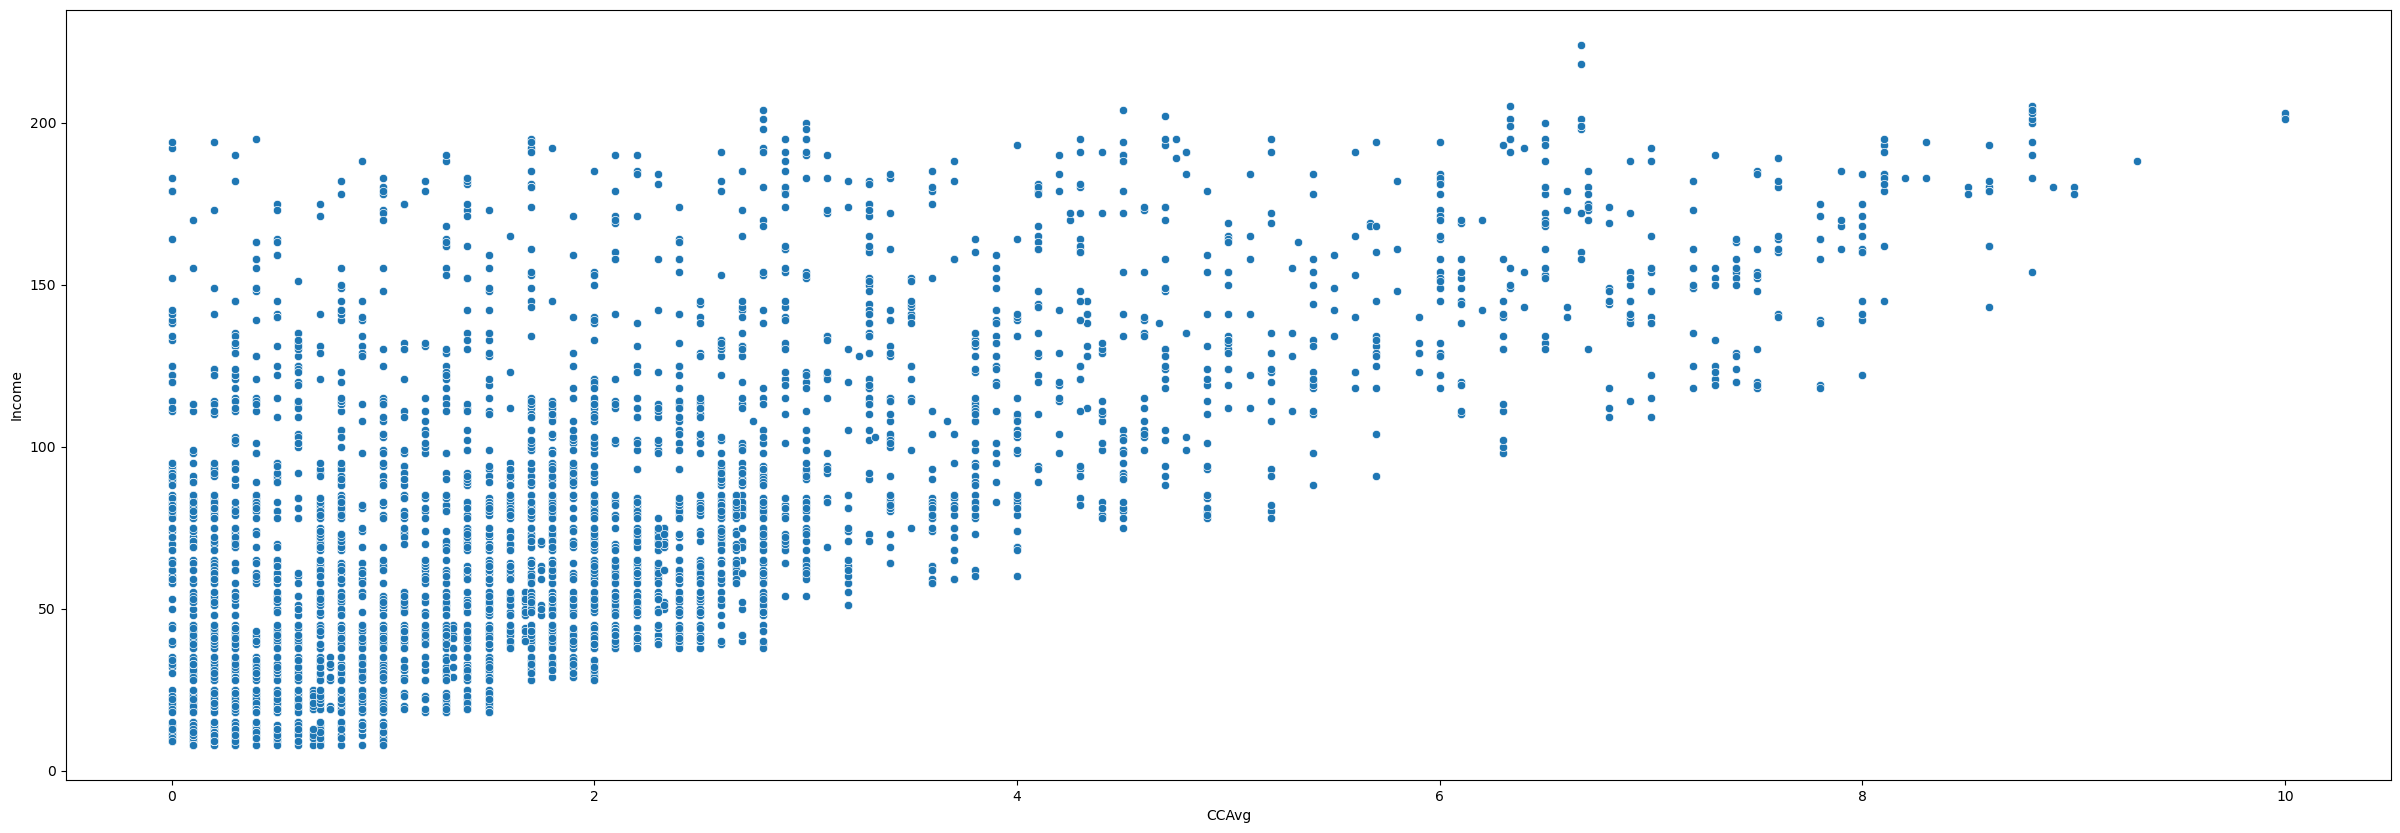

In [1725]:
###
plt.figure(figsize=(30,10))
sns.scatterplot(x="CCAvg", y="Income", data=Loan_Data)
plt.show()

In [1726]:
print(Loan_Data.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'County', 'State'],
      dtype='object')


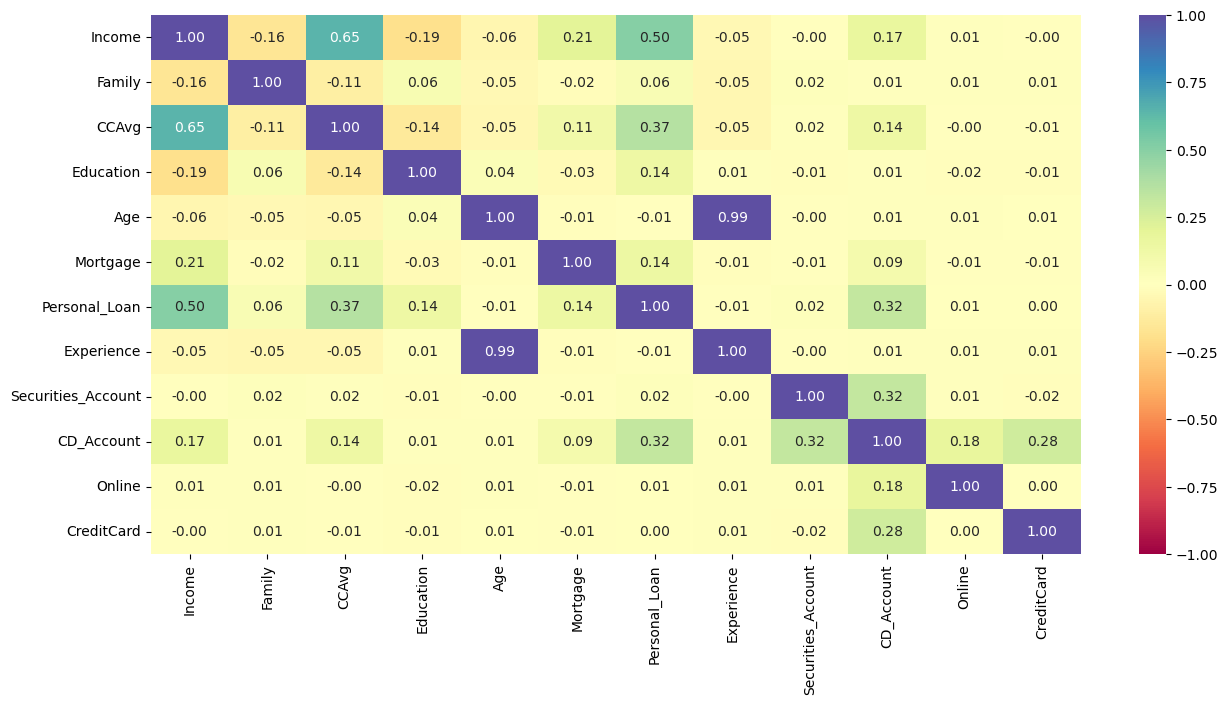

In [1727]:
columns= ['Income','Family', 'CCAvg','Education','Age','Mortgage', 'Personal_Loan', 'Experience','Securities_Account','CD_Account', 'Online', 'CreditCard', 'City', 'County', 'State']

plt.figure(figsize=(15, 7))
sns.heatmap(
Loan_Data[columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- Put something

## Data Preprocessing (continued)


* Outlier detection and treatment 
* Preparing data for modeling



#### Dropping variables
- Drop zip as we are using county, city and state.
- Drop the Experience as it's so correlated with age and will not add value
- Drop state as its all california

In [1728]:

# Drop the ZIP column before we start the next analysis
Loan_Data.drop(columns=['ZIPCode'], inplace=True)

# Drop the Experience as it's so correlated with age and will not add value
Loan_Data.drop(columns=['Experience'], inplace=True)
# Drop the State as it's all california
Loan_Data.drop(columns=['State'], inplace=True)


#### Outlier Detection

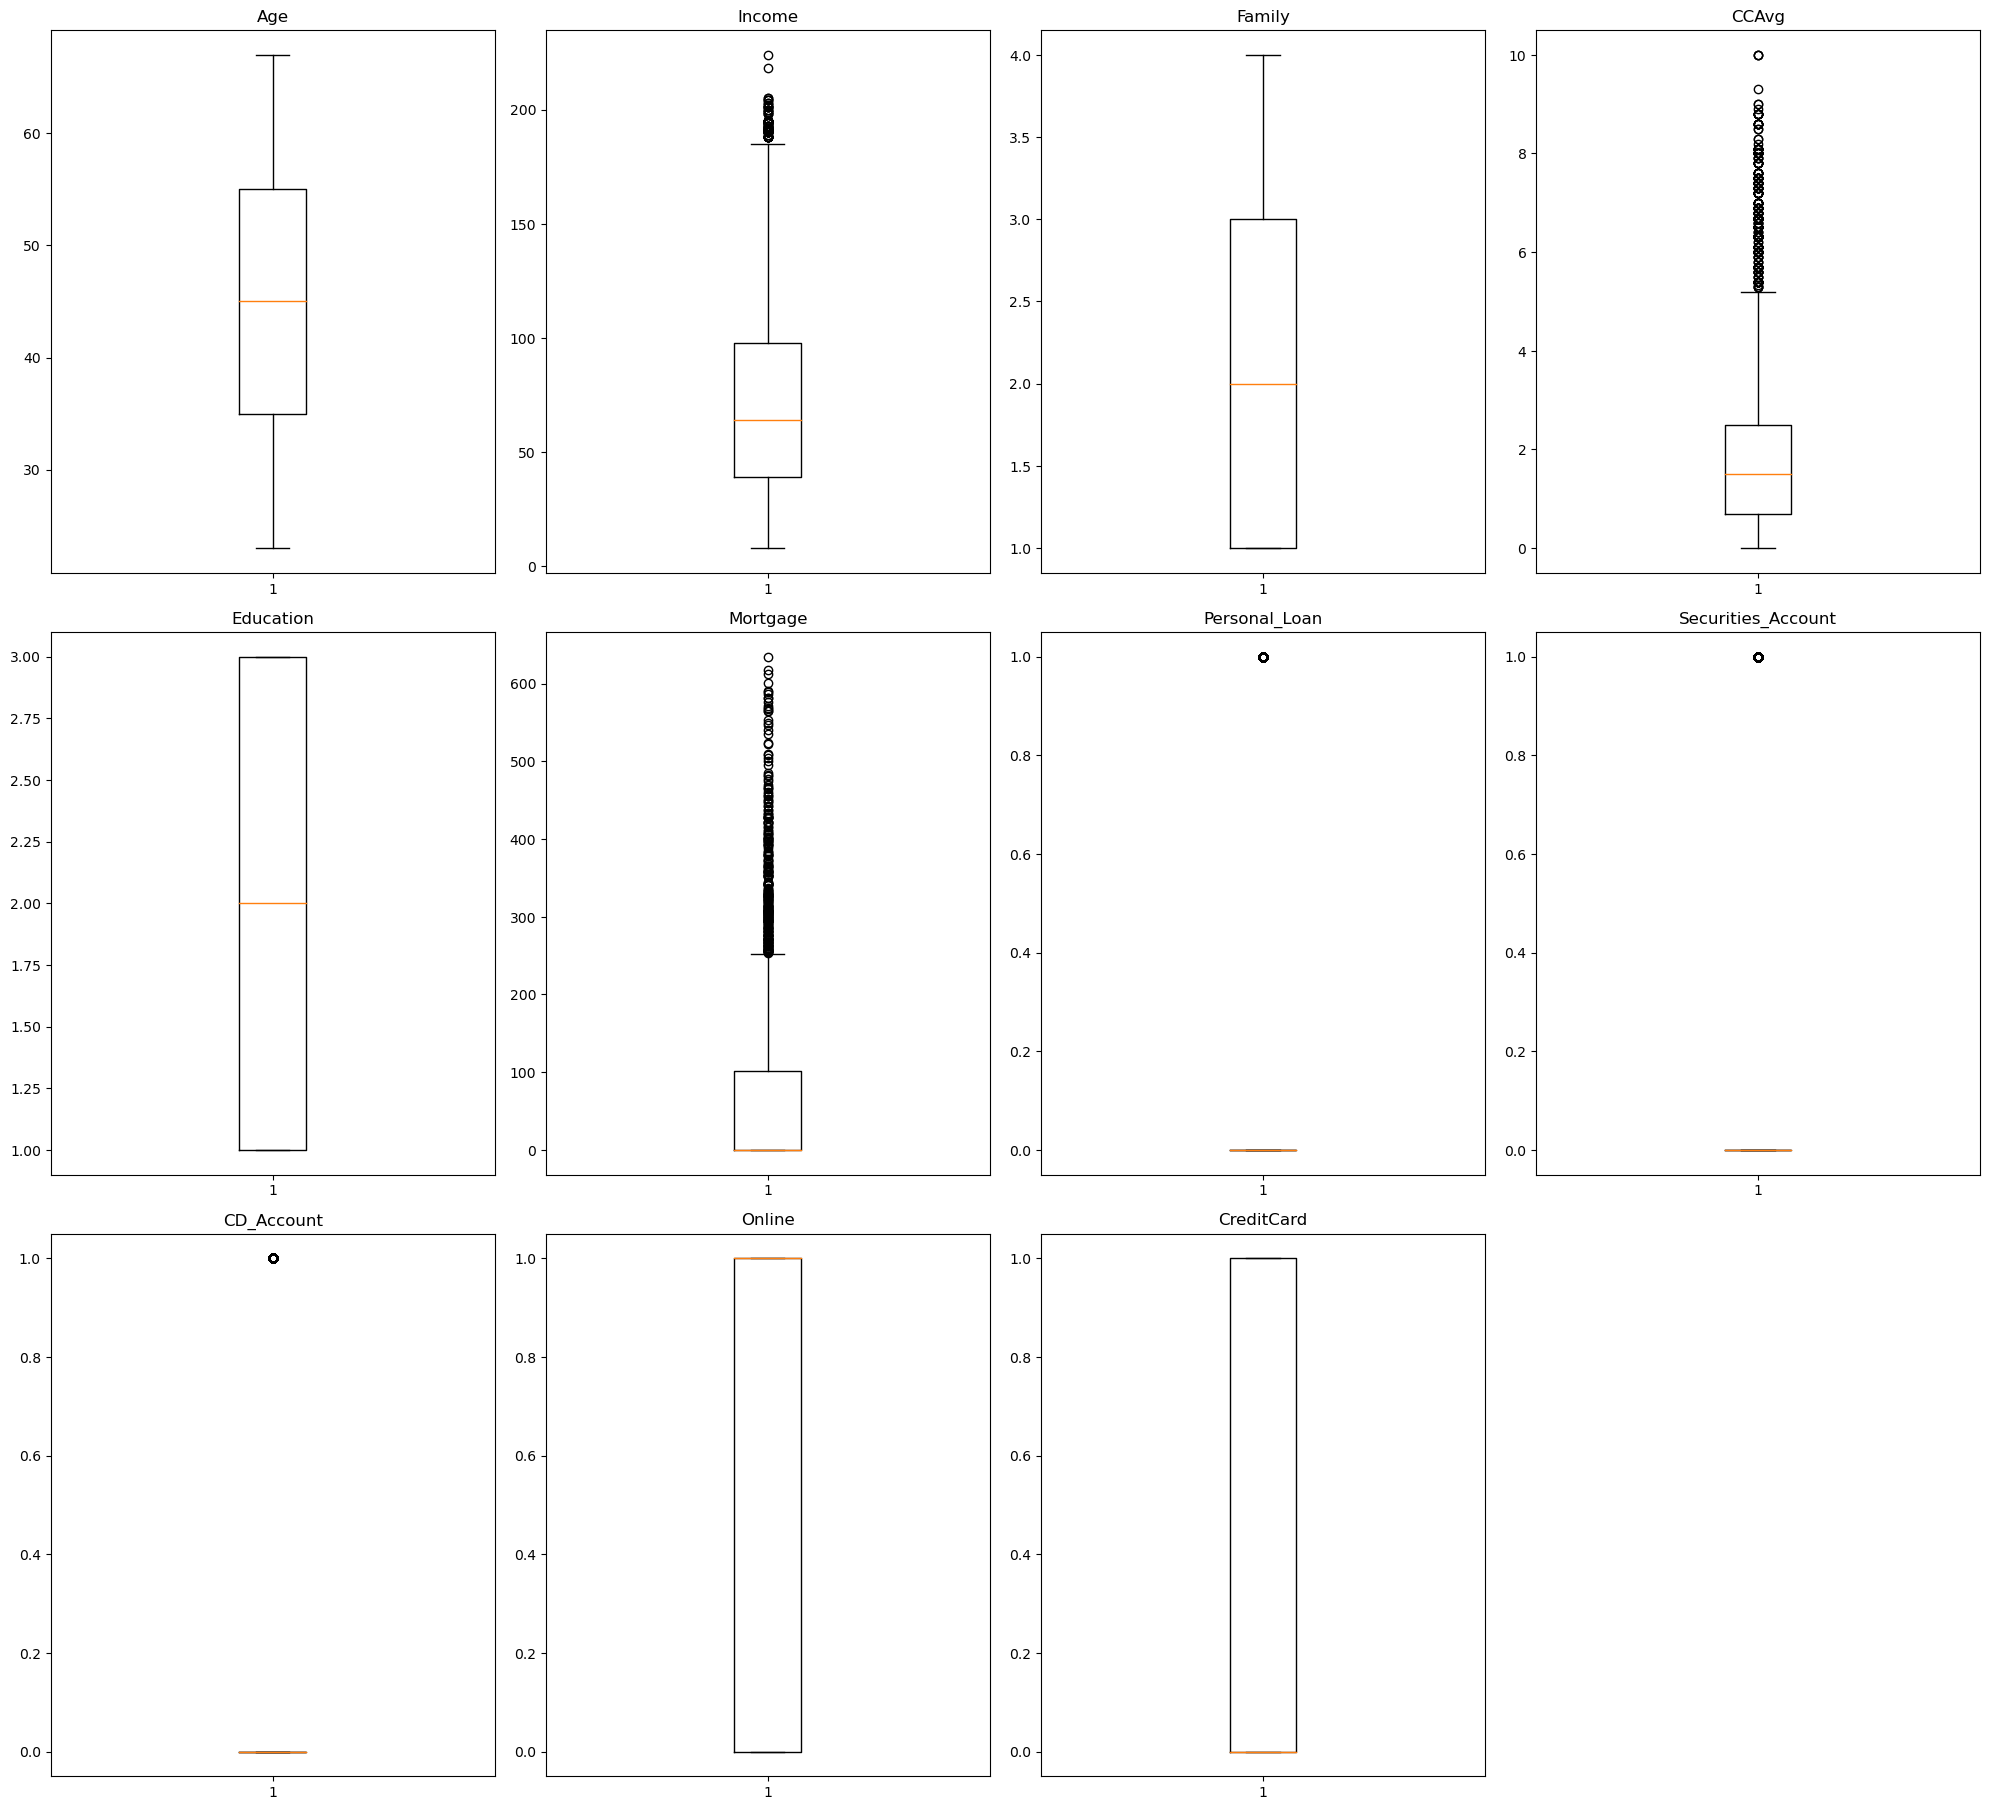

In [1729]:
numerical_col = Loan_Data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(Loan_Data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Outlier Treatment


In [1730]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

##### output new dataframe without personal loan pior to dropping outliers (if we drop personal loan outliers our model will not work as personal loan is 1 and 0)


In [1731]:
# output new dataframe without personal loan pior to dropping outliers (if we drop personal loan outliers our model will not work as personal loan is 1 and 0)
treatOut = Loan_Data.drop(columns=['Personal_Loan'])

In [1732]:
#treat all outliers by removing 
numerical_col = treatOut.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(treatOut, numerical_col)

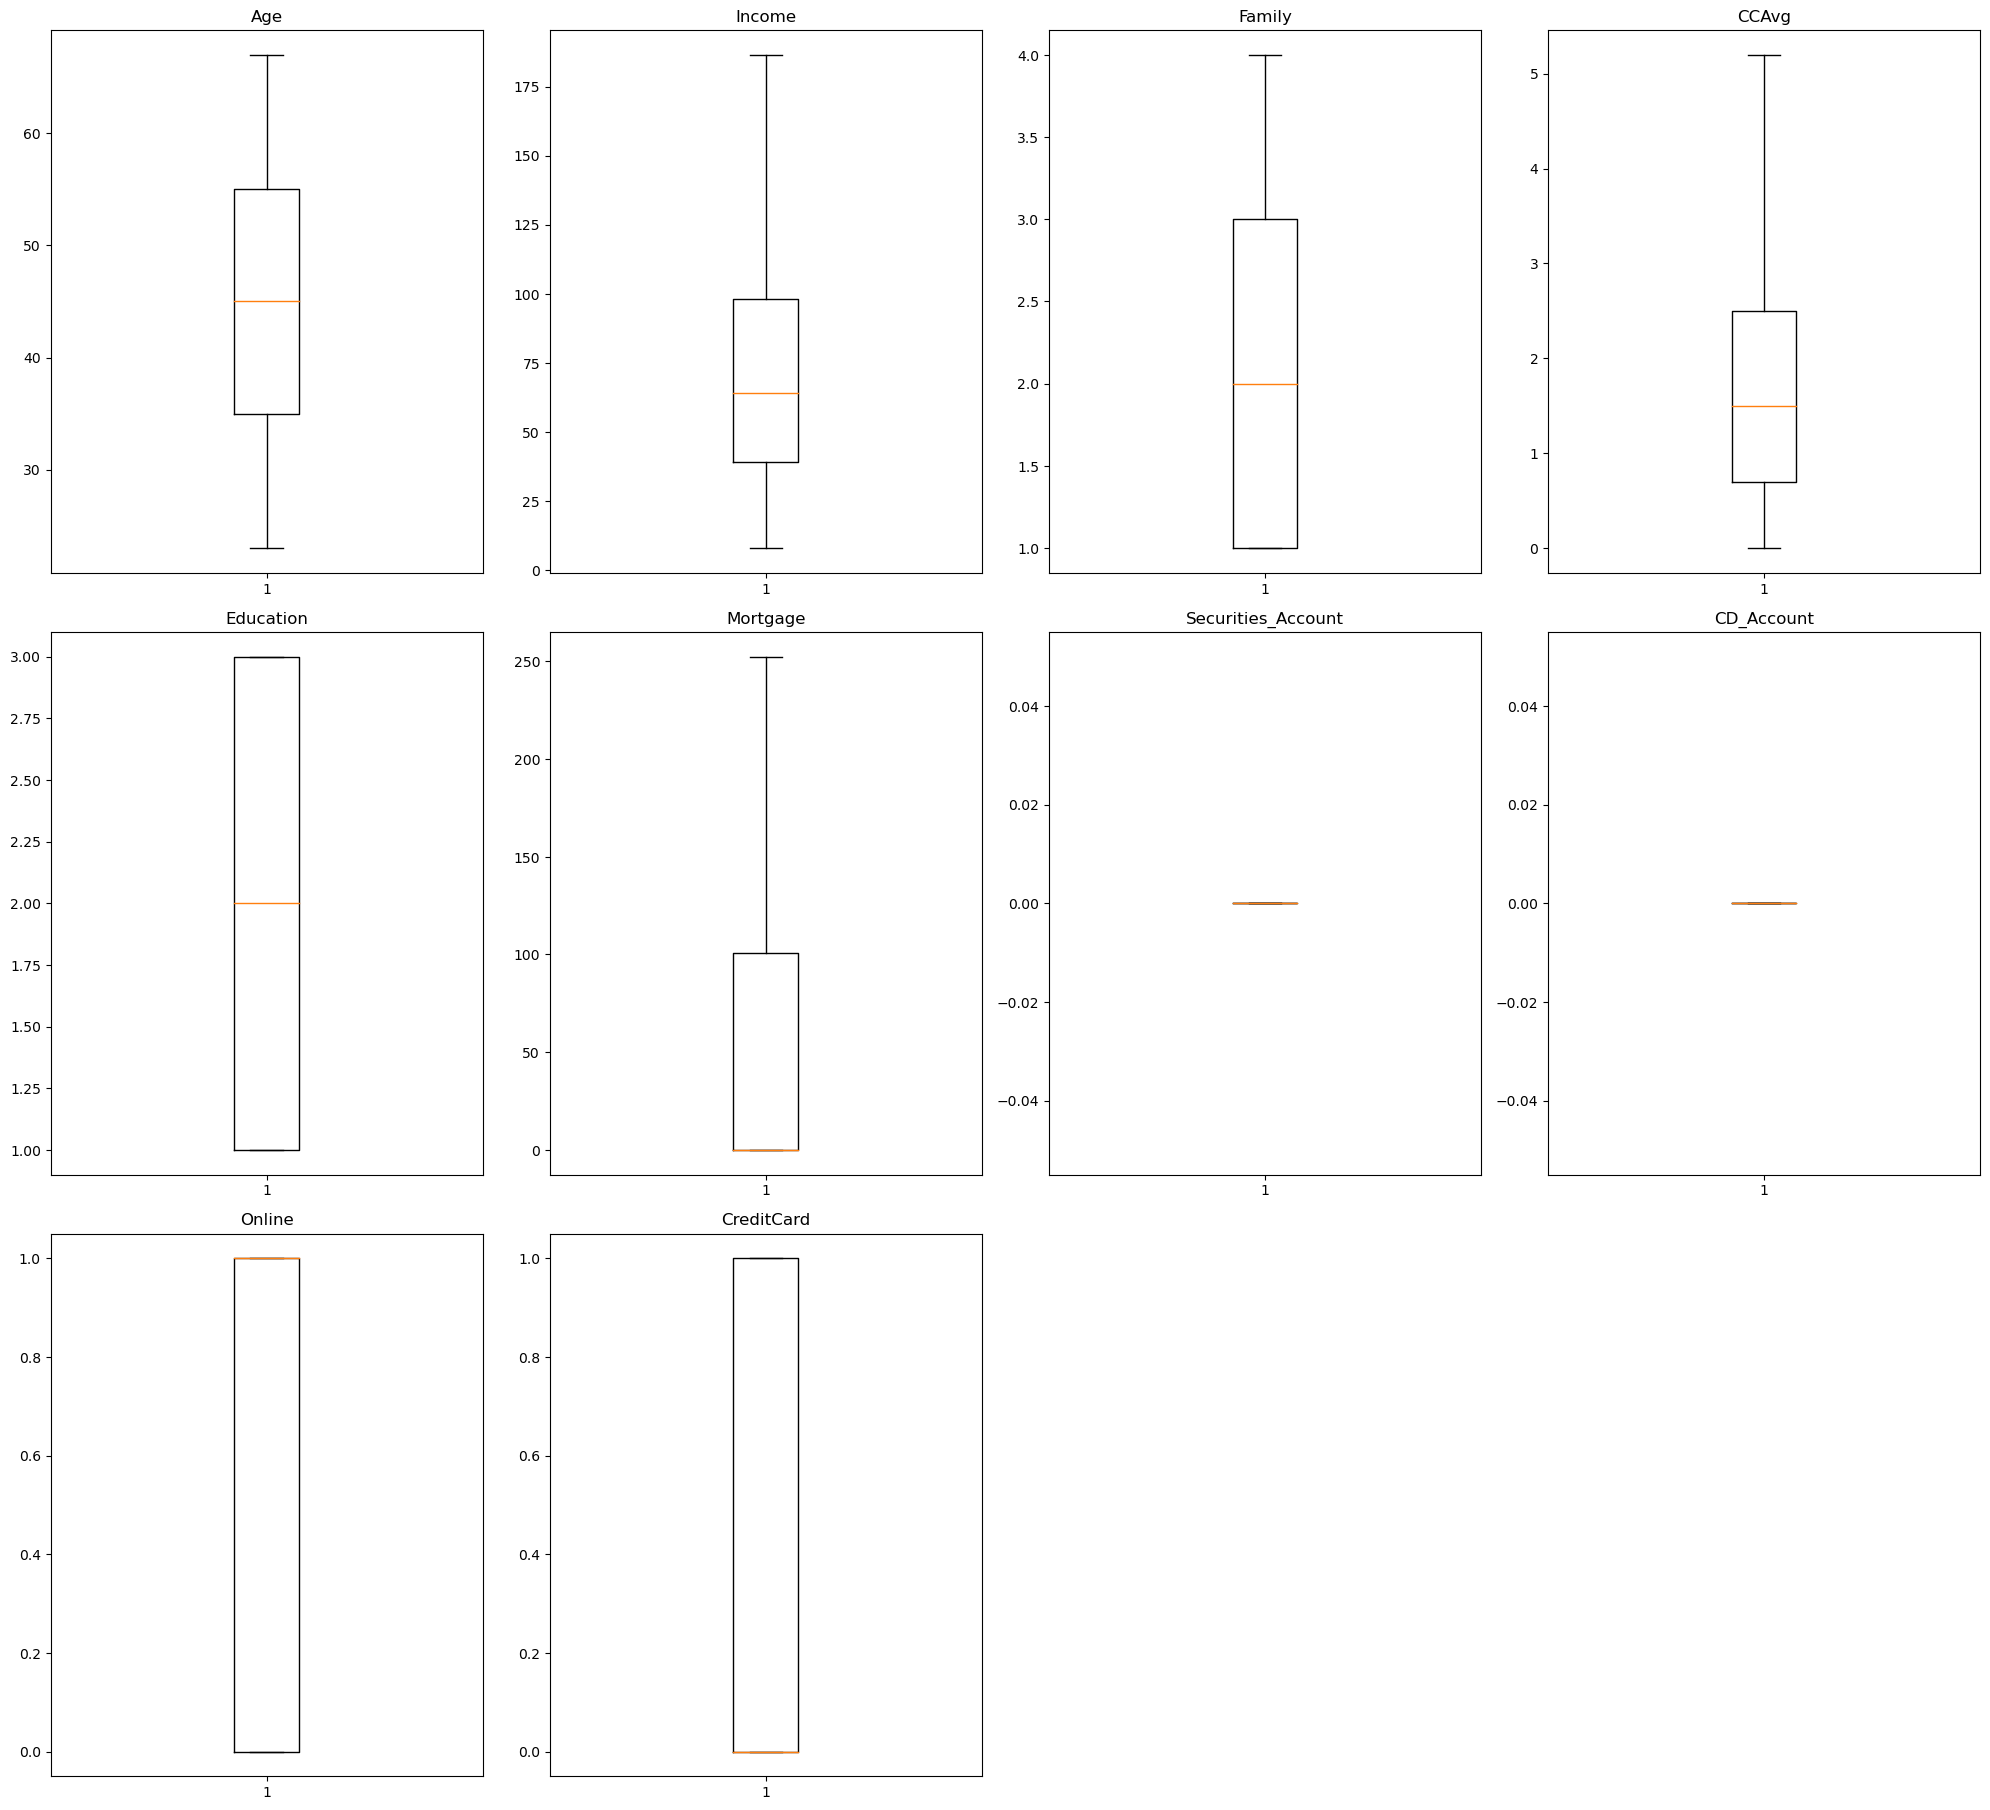

In [1733]:
# look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations
- All outliers managed

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will get a personal loan but in reality the customer does not get a personal loan - False Positives
2. Predicting a customer will not get a personal loan but in reality the customer does get a personal loan - Loss of opportunity - False Negatives

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan. - False Negatives

**How to reduce this loss i.e need to reduce False Negatives?**

* We need to Maximize Recall, the greater the Recall, the higher the chances of minimizing false negatives. 
Our focus will be on increasing Recall or minimizing the false negatives.* 


### Model Building: Logistic Regression

**Creating training and test sets.**

In [1734]:
# Rechecking the state of the dataframe to ensure all columns are as expected
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal_Loan       5000 non-null   int64  
 7   Securities_Account  5000 non-null   int64  
 8   CD_Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  City                5000 non-null   object 
 12  County              5000 non-null   object 
dtypes: float64(1), int64(10), object(2)
memory usage: 507.9+ KB


In [1735]:
# specifying the independent  and dependent variables
X = Loan_Data.drop(["Personal_Loan"], axis=1)
Y = Loan_Data["Personal_Loan"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [1736]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("")
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Loan_Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Loan_Data.index)) * 100))

Shape of Training set :  (3500, 291)
Shape of test set :  (1500, 291)

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64

70.00% data is in training set
30.00% data is in test set


#### Observation 
- We have a perfect allocatioon or 70/30 training to test
- We have a fairly equal representation of the independent variable across training a test data sets


In [1737]:
# we will use this to do all performance metrics and test various thresholds
#  threshold has default value of .5
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [1738]:
# we will use this to do all performance metrics and test various thresholds
#  threshold has default value of .5
def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


#### Build Logistic Model

In [1739]:
# Building the model woth SKlearn Logistic Regression method
lg = LogisticRegression(random_state=1)
#Fitting the training data
model = lg.fit(X_train, y_train)

In [1772]:
# initial model 
model_score = model.score(X_test, y_test)
print("The score indcates that " + str(round(model_score*100)) + "% of the time predictions are correct and " + str(round(100-(model_score*100))) + "% of the predictions are incorrect.")

The score indcates that 94% of the time predictions are correct and 6% of the predictions are incorrect.


#### Observations 
- The score indcates that 94% of the time predictions are correct and 6% of the predictions are incorrect.

### Model Performance Improvement: Logistic Regression

#### ROC AUC

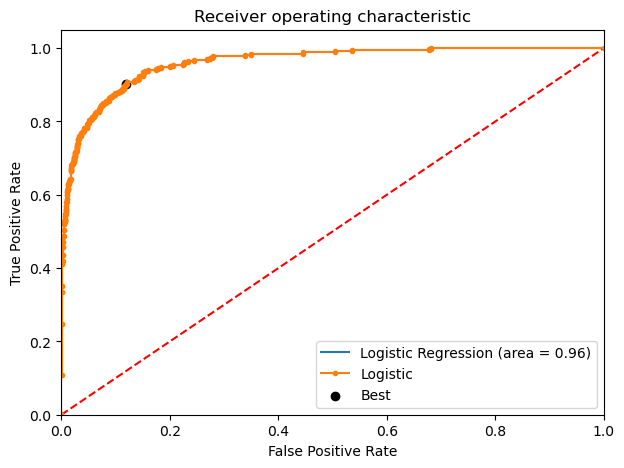

In [1741]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observation
- Black marker indicates the optimal threshold which is the optimal balance between FP and TP

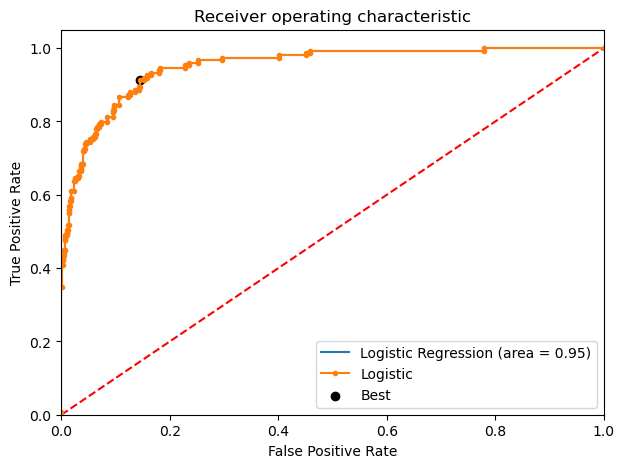

In [1742]:
# Find the roc auc score for test data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observation 
- The AUC is .96 on the test and .95 on the training data set which is pretty close to 1, this is a good model.
- Black marker indicates the optimal threshold which is the optimal balance between FP and TP


In [1743]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold for ROC AUC is " + str(optimal_threshold_auc_roc))

The optimal threshold for ROC AUC is 0.10923215086497905


#### Observation
- Optimal threshold of roughly .109 matches best threshold in plots above.

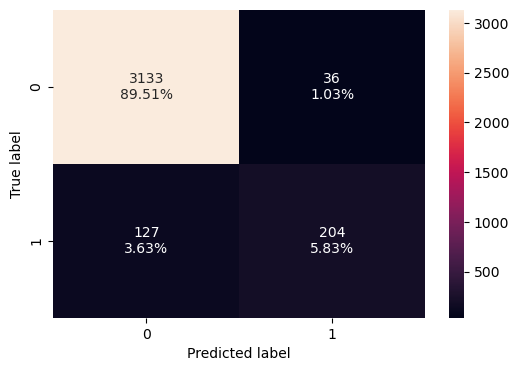

In [1744]:
# create confusion matrix training data
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [1745]:
# checking model performance for this model with training data
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)
print("The training performance:")
log_reg_model_train_perf


The training performance:


,Accuracy,Recall,Precision,F1
0,0.953429,0.616314,0.85,0.714536


#### Observations
- Training performance has very high accuracy and good precisions
- The Recall is on the lower end
- True Positive = 89.51
- True Negative = 5.83
- False Positive Type 1 = 3.63
- False Negative Type 2 =  1.03

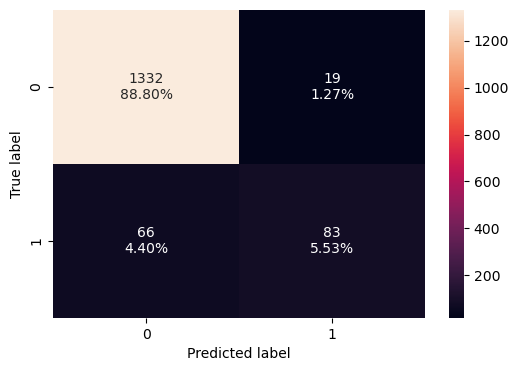

In [1746]:
# create confusion matrix on test data
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [1747]:
# checking model performance for this model with test data
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)
print("Test data performance:")
log_reg_model_test_perf

Test data performance:


,Accuracy,Recall,Precision,F1
0,0.943333,0.557047,0.813725,0.661355


#### Observations
- True Positive = 88.80
- True Negative = 5.53
- False Positive Type 1 = 4.40
- False Negative Type 2 =  1.27
- Test performance has high accuracy and good precision
- The Recall is on the lower end as well
- Test as expected does not perform quite as well as train data

#### Use optimal thresholds calulated and retest performance
- We will check to see if using an optimal threshold calculate will improve performance

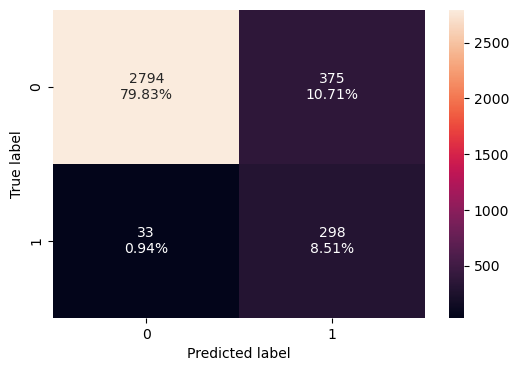

In [1748]:
# create confusion matrix training data with optimal Threshold
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train,threshold=optimal_threshold_auc_roc)

In [1749]:
# checking model performance for this model with training data with optimal threshold
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train,threshold=optimal_threshold_auc_roc)
print("The training performance:")
log_reg_model_train_perf_threshold_auc_roc


The training performance:


,Accuracy,Recall,Precision,F1
0,0.883429,0.900302,0.442793,0.593625


#### Observation
- True Positive = 79.83
- True Negative = 8.51
- False Positive Type 1 = 10.71
- False Negative Type 2 =  .94
- Recall improved a lot in but at the expense of precision which dropped a lot.
- F1 which measure precision and recall together also dropped

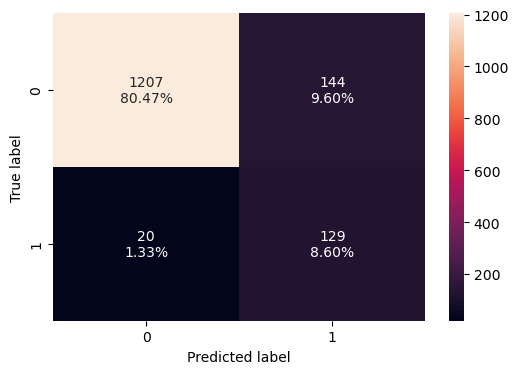

In [1750]:
# create confusion matrix test data with optimal Threshold
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test,threshold=optimal_threshold_auc_roc)

In [1751]:
# checking model performance for this model with test data with optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test,threshold=optimal_threshold_auc_roc)
print("The test performance:")
log_reg_model_test_perf_threshold_auc_roc

The test performance:


,Accuracy,Recall,Precision,F1
0,0.890667,0.865772,0.472527,0.611374


#### Observations
- True Positive = 80.47
- True Negative = 8.60
- False Positive Type 1 = 9.6
- False Negative Type 2 =  1.33
- Test performance has high accuracy and high recall (very good for us as we want to maximise recall)
- Test as expected does not perform quite as well as train data

#### Precision Recall curve setup

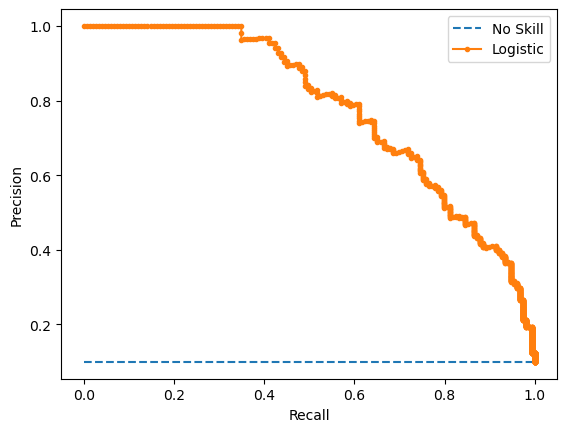

In [1752]:
# predict probabilities
yh = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yh = yh[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yh)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.277795, F-Score=0.693


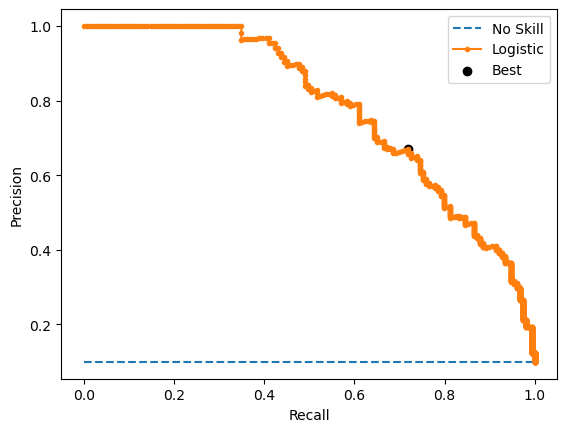

In [1753]:
# predict probabilities
yh = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yh = yh[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yh)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

##### Check performance on test and training with optimal threshold from precision recall

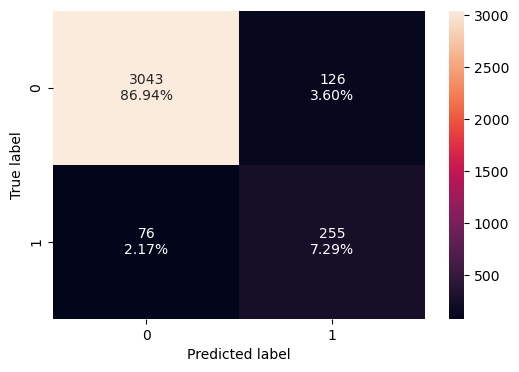

In [1754]:
# create confusion matrix training data with optimal Threshold
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train,threshold=thresholds[ix])

In [1755]:
# checking model performance for this model with training data with optimal threshold
log_reg_model_train_perf_threshold_P_Recall = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train,threshold=thresholds[ix])
print("The training performance:")
log_reg_model_train_perf_threshold_P_Recall


The training performance:


,Accuracy,Recall,Precision,F1
0,0.942286,0.770393,0.669291,0.716292


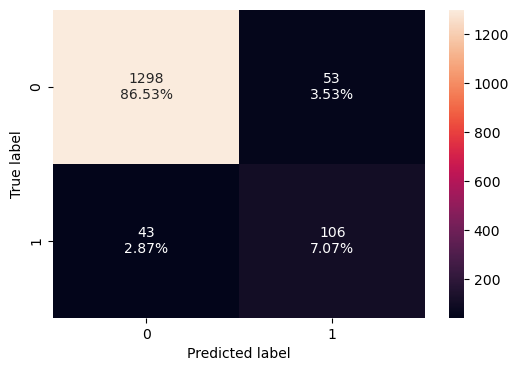

In [1756]:
# create confusion matrix test data with optimal Threshold
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test,threshold=thresholds[ix])

In [1757]:
# checking model performance for this model with test data with optimal threshold
log_reg_model_test_perf_threshold_P_Recall = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test,threshold=thresholds[ix])
print("The test performance:")
log_reg_model_test_perf_threshold_P_Recall


The test performance:


,Accuracy,Recall,Precision,F1
0,0.936,0.711409,0.666667,0.688312


In [1765]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_P_Recall.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression with optimal ROC AUC threshold",
    "Logistic Regression with optimal precision recall",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression with optimal ROC AUC threshold,Logistic Regression with optimal precision recall
Accuracy,0.953429,0.883429,0.936000
Recall,0.616314,0.900302,0.711409
Precision,0.850000,0.442793,0.666667
F1,0.714536,0.593625,0.688312


In [1766]:
# Test performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_P_Recall.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression with optimal ROC AUC threshold",
    "Logistic Regression with optimal precision recall",
]

print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Logistic Regression sklearn,Logistic Regression with optimal ROC AUC threshold,Logistic Regression with optimal precision recall
Accuracy,0.943333,0.890667,0.936000
Recall,0.557047,0.865772,0.711409
Precision,0.813725,0.472527,0.666667
F1,0.661355,0.611374,0.688312


### Model Building: Decision Tree

In [1773]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

### Model Performance Improvement: Decision Tree

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___